In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
df=pd.read_csv("iphone_purchase_records.csv")
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [38]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [39]:
df= df.drop_duplicates()

In [40]:
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [27]:
df = data_cleaned.duplicated().sum()
print(df)
print(data_cleaned.shape)

0
(380, 4)


In [28]:
df.dtype


dtype('int64')

In [41]:
X = df.iloc[:, :-1]
X

,Gender,Age,Salary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [43]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 380, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [46]:
l_gender=LabelEncoder()
X['Gender']=l_gender.fit_transform(X['Gender'])

In [47]:
X

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [48]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state=42)
X_train

,Gender,Age,Salary
346,1,53,72000
354,1,36,99000
395,0,46,41000
297,0,43,112000
227,1,56,133000
...,...,...,...
71,0,24,27000
108,1,26,86000
278,0,52,38000
363,0,42,79000


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss=StandardScaler()
ss

StandardScaler()

In [52]:
X_train= ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [55]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [56]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [57]:
pred=classifier.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [58]:
cm=confusion_matrix(y_test,pred)
cm

array([[57, 12],
       [ 1, 44]], dtype=int64)

In [59]:
acc=accuracy_score(y_test,pred)
acc

0.8859649122807017

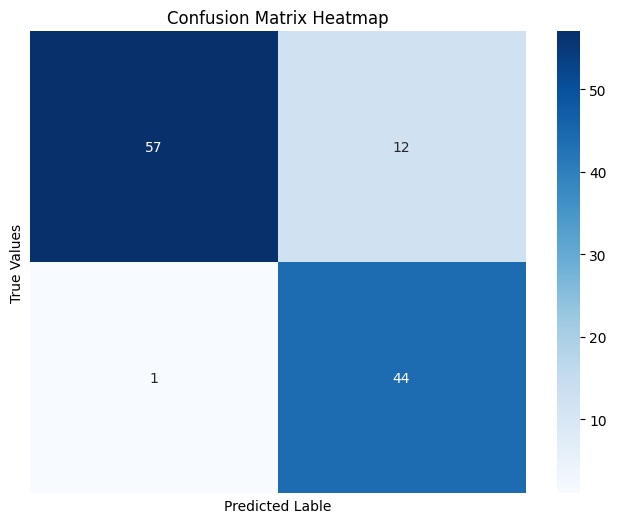

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[],
            yticklabels=[])
plt.xlabel('Predicted Lable')
plt.ylabel('True Values')
plt.title('Confusion Matrix Heatmap')
plt.show()

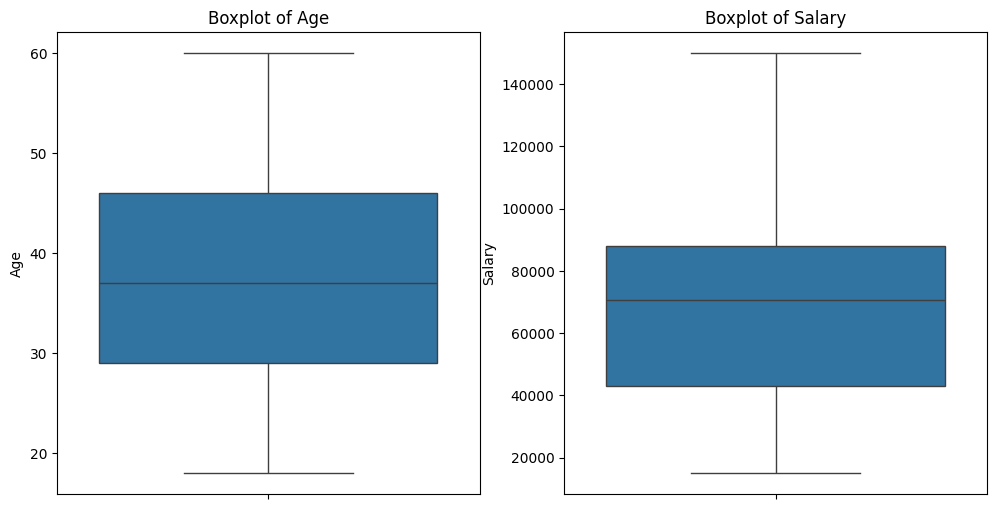

In [61]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data_cleaned['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(df['Salary'])
plt.title('Boxplot of Salary')

plt.show()


In [62]:
f1 = f1_score(y_test,pred)
f1

0.8712871287128713

In [68]:
#df.iloc[:300]

In [67]:
#df = df.drop(['Age'],axis=1)
#df